In [12]:
import pandas as pd
import numpy as np

import metrics_summary as ms

In [13]:
np.random.seed(170)

In [14]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").values.ravel()
y_test = pd.read_csv("data/y_test.csv").values.ravel()

## Random Forest

[[50569   169]
 [ 5706   293]]
Kappa Score: 0.07673724286891981
Accuracy Score: 0.8964520506900259
Precision: 0.6341991341991342
Recall: 0.048841473578929824
F1 Score: 0.09069803436000619
AUC Score: 0.522755318365404
Average Accuracy Score: 0.8959935322788152
Average Precision Score: 0.6162051541038613
Average Recall Score: 0.042940677331488326
Average F1 Score: 0.8959935322788152
[0.89632668 0.89589612 0.8957578 ]
Average AUC Score: 0.8521118211120591
[0.84993284 0.8552825  0.85112013]


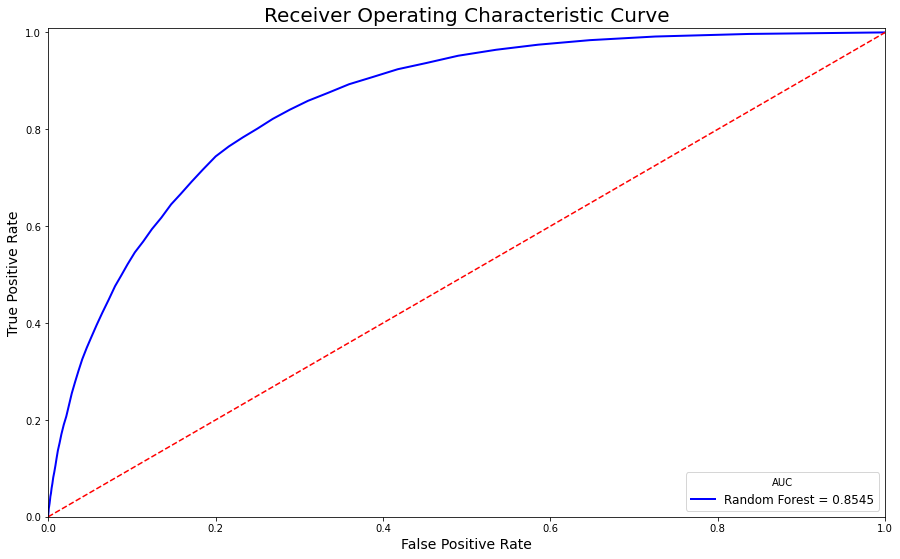

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(rf, X_train, y_train)
ms.plot_roc(rf, "Random Forest", X_test, y_test)

#### Random Forest Using Cost-Sensitive Learning

[[50565   173]
 [ 5728   271]]
Kappa Score: 0.07057820234034817
Accuracy Score: 0.8959937959356329
Precision: 0.6103603603603603
Recall: 0.045174195699283215
F1 Score: 0.08412230327487197
AUC Score: 0.520882261238029
Average Accuracy Score: 0.8957216020842994
Average Precision Score: 0.6060394152526766
Average Recall Score: 0.03901103924354834
Average F1 Score: 0.8957216020842994
[0.89576016 0.89566951 0.89573513]
Average AUC Score: 0.8574897748541946
[0.85631567 0.85734591 0.85880774]


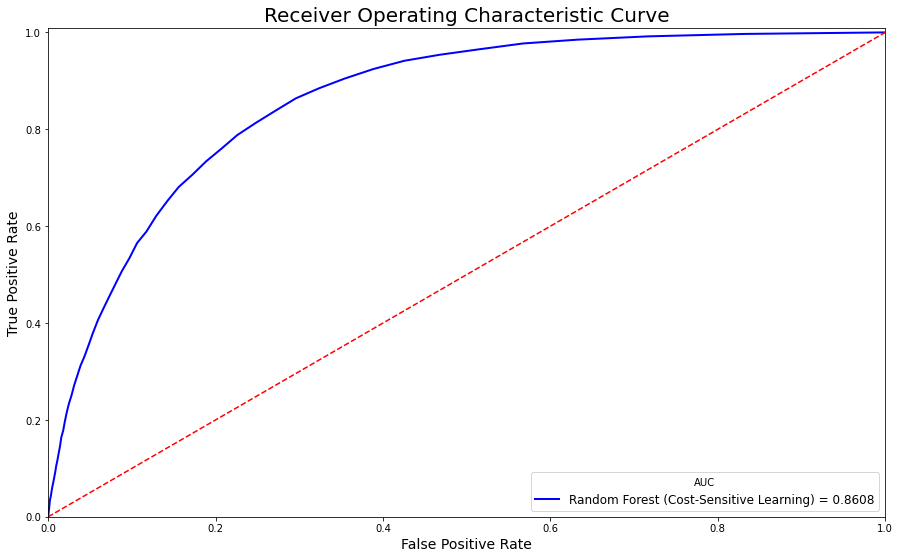

In [16]:
rf_cs = RandomForestClassifier(class_weight="balanced")
rf_cs.fit(X_train, y_train)
y_pred = rf_cs.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(rf_cs, X_train, y_train)
ms.plot_roc(rf_cs, "Random Forest (Cost-Sensitive Learning)", X_test, y_test)

## Random Forest Using SMOTE

[[50445   293]
 [ 5572   427]]
Kappa Score: 0.1068632828808379
Accuracy Score: 0.8966283025186387
Precision: 0.5930555555555556
Recall: 0.07117852975495916
F1 Score: 0.12710224735823783
AUC Score: 0.5327018826393148
Average Accuracy Score: 0.8961219419669758
Average Precision Score: 0.573617821624686
Average Recall Score: 0.0677335010498361
Average F1 Score: 0.8961219419669758
[0.89589612 0.89693852 0.89553118]
Average AUC Score: 0.8507762192804055
[0.85012754 0.8539434  0.84825771]


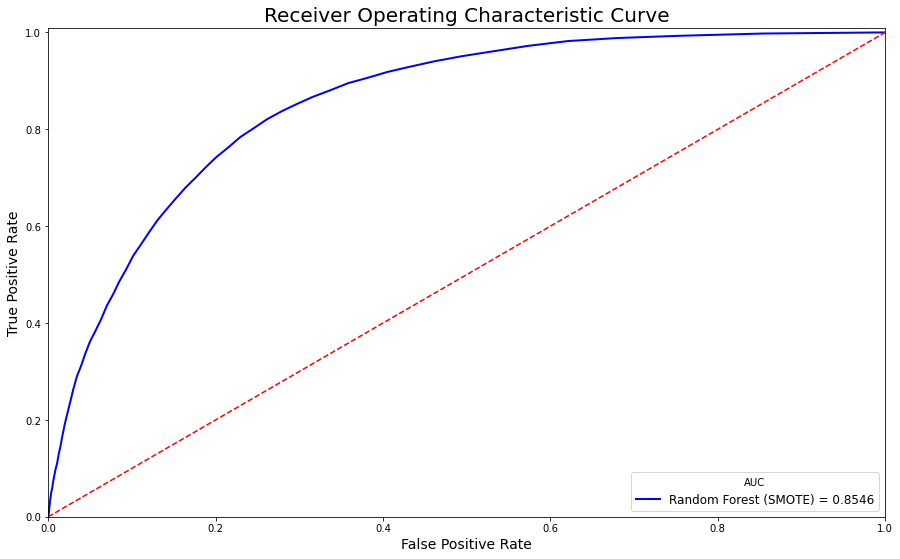

In [17]:
# implement SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('over', SMOTE()), ('model', RandomForestClassifier())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(pipeline, X_train, y_train)
ms.plot_roc(pipeline, "Random Forest (SMOTE)", X_test, y_test)

In [18]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV

# n_estimators = [10, 100, 1000, 10000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)
# grid_search = GridSearchCV(estimator=rf_os, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))